# Utility Functions and Helpers
Common helper functions and utilities for data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

def data_quality_report(df):
    """
    Generate a comprehensive data quality report.
    """
    print("=== DATA QUALITY REPORT ===")
    print(f"Dataset shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print("\nColumn Information:")
    for col in df.columns:
        null_pct = (df[col].isnull().sum() / len(df)) * 100
        unique_vals = df[col].nunique()
        dtype = df[col].dtype
        print(f"  {col}: {dtype}, {null_pct:.1f}% null, {unique_vals} unique values")
    
    print("\nMissing Values Summary:")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing Count': missing,
        'Missing %': missing_pct
    })
    print(missing_df[missing_df['Missing Count'] > 0])
    
    return missing_df

# Test the function
sample_data = pd.DataFrame({
    'id': range(1, 101),
    'name': ['User_' + str(i) for i in range(1, 101)],
    'age': np.random.randint(18, 80, 100),
    'salary': np.random.normal(50000, 15000, 100),
    'department': np.random.choice(['IT', 'HR', 'Finance', 'Marketing'], 100)
})

# Add some missing values for demonstration
sample_data.loc[sample_data.sample(10).index, 'salary'] = np.nan
sample_data.loc[sample_data.sample(5).index, 'department'] = np.nan

quality_report = data_quality_report(sample_data)
print("\nFirst 5 rows:")
print(sample_data.head())

=== DATA QUALITY REPORT ===
Dataset shape: (100, 5)
Memory usage: 0.01 MB

Column Information:
  id: int64, 0.0% null, 100 unique values
  name: object, 0.0% null, 100 unique values
  age: int64, 0.0% null, 51 unique values
  salary: float64, 10.0% null, 90 unique values
  department: object, 5.0% null, 4 unique values

Missing Values Summary:
            Missing Count  Missing %
salary                 10       10.0
department              5        5.0

First 5 rows:
   id    name  age        salary department
0   1  User_1   45  37687.553444    Finance
1   2  User_2   49  60397.002358         IT
2   3  User_3   45  47929.367807         HR
3   4  User_4   44  17946.136581  Marketing
4   5  User_5   27  63130.922194    Finance


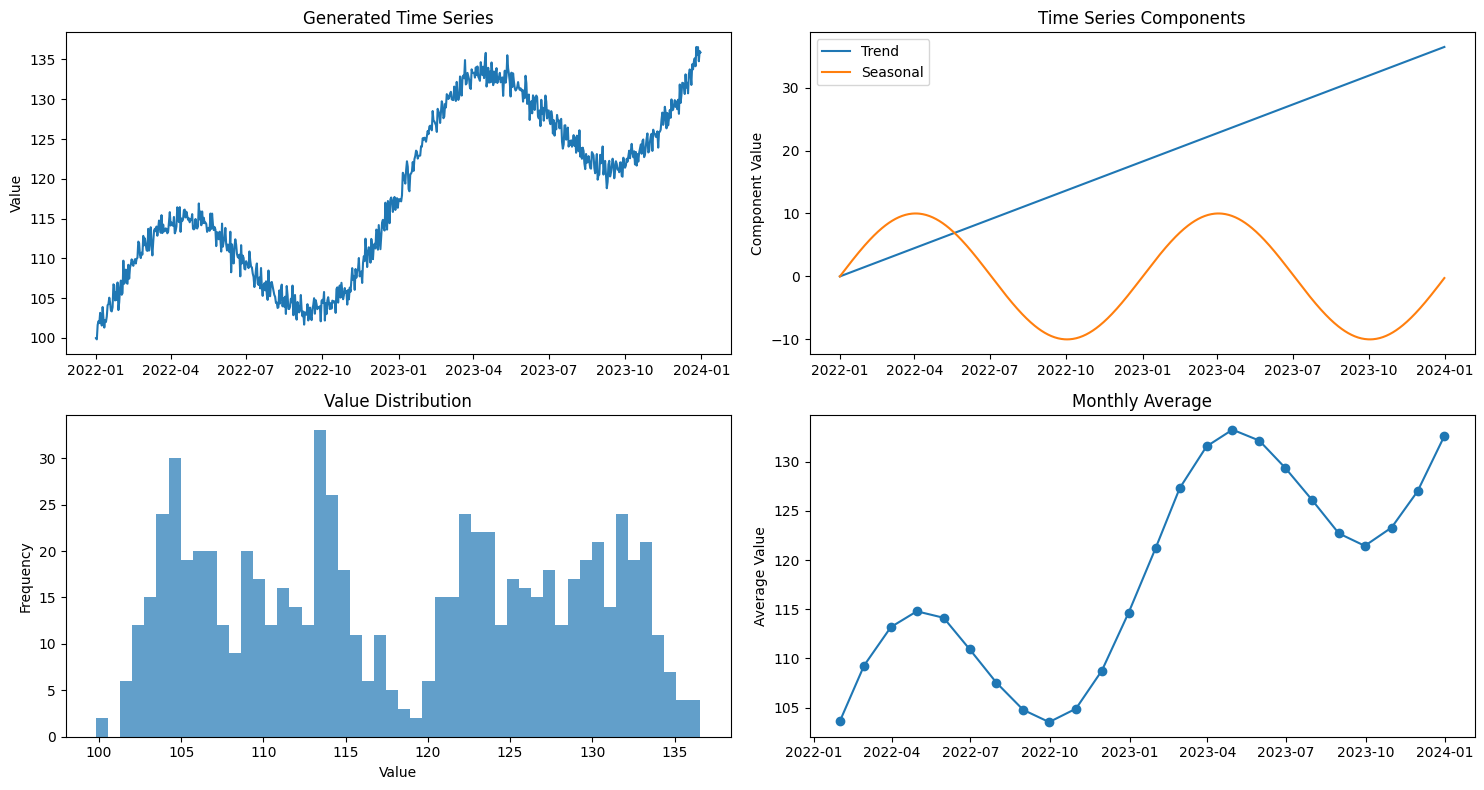


Time series generated with 730 data points
Date range: 2022-01-01 00:00:00 to 2023-12-31 00:00:00
Value range: 99.82 to 136.57


In [2]:
def generate_time_series(start_date, periods, freq='D', trend=0.1, seasonality=True, noise_level=0.1):
    """
    Generate synthetic time series data with trend and seasonality.
    """
    dates = pd.date_range(start=start_date, periods=periods, freq=freq)
    
    # Base trend
    trend_component = np.arange(periods) * trend
    
    # Seasonal component
    if seasonality:
        seasonal_component = 10 * np.sin(2 * np.pi * np.arange(periods) / 365.25)
    else:
        seasonal_component = 0
    
    # Random noise
    noise = np.random.normal(0, noise_level * 10, periods)
    
    # Combine components
    values = 100 + trend_component + seasonal_component + noise
    
    return pd.DataFrame({
        'date': dates,
        'value': values,
        'trend': trend_component,
        'seasonal': seasonal_component,
        'noise': noise
    })

# Generate and visualize time series
ts_data = generate_time_series('2022-01-01', 730, trend=0.05, seasonality=True)

plt.figure(figsize=(15, 8))

# Original time series
plt.subplot(2, 2, 1)
plt.plot(ts_data['date'], ts_data['value'])
plt.title('Generated Time Series')
plt.ylabel('Value')

# Components
plt.subplot(2, 2, 2)
plt.plot(ts_data['date'], ts_data['trend'], label='Trend')
plt.plot(ts_data['date'], ts_data['seasonal'], label='Seasonal')
plt.title('Time Series Components')
plt.legend()
plt.ylabel('Component Value')

# Distribution
plt.subplot(2, 2, 3)
plt.hist(ts_data['value'], bins=50, alpha=0.7)
plt.title('Value Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Monthly aggregation
plt.subplot(2, 2, 4)
monthly_avg = ts_data.set_index('date').resample('M')['value'].mean()
plt.plot(monthly_avg.index, monthly_avg.values, marker='o')
plt.title('Monthly Average')
plt.ylabel('Average Value')

plt.tight_layout()
plt.show()

print(f"\nTime series generated with {len(ts_data)} data points")
print(f"Date range: {ts_data['date'].min()} to {ts_data['date'].max()}")
print(f"Value range: {ts_data['value'].min():.2f} to {ts_data['value'].max():.2f}")

Performance Metrics for Sample Model:
  Metric    Value
0    MSE  24.4170
1   RMSE   4.9414
2    MAE   3.9045
3     R²   0.9292


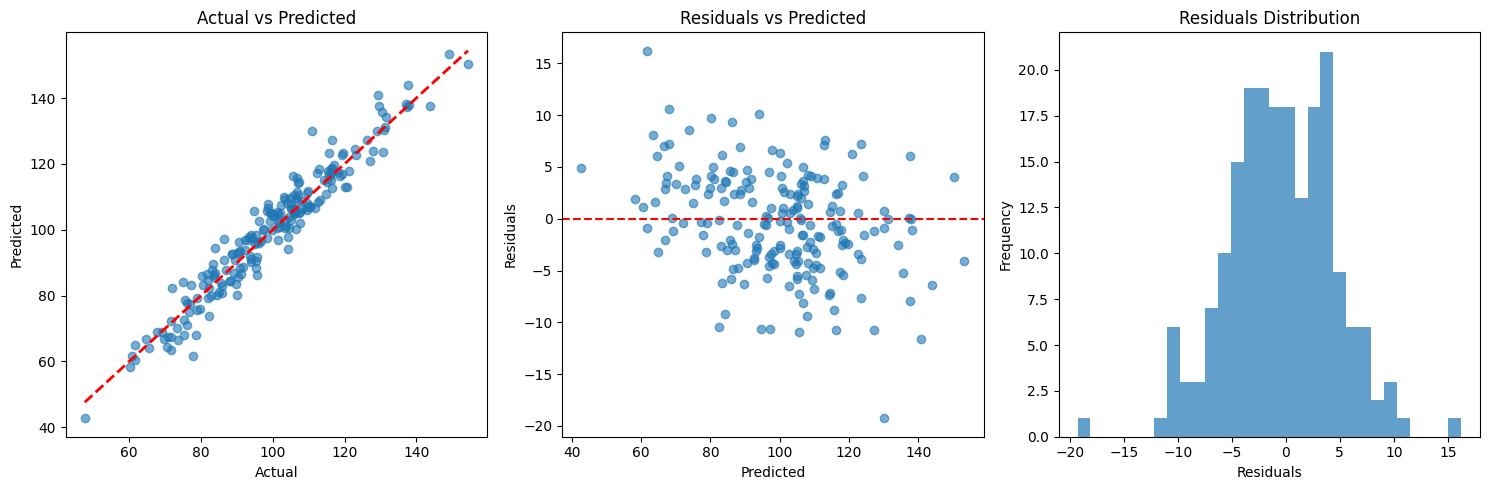

In [3]:
def performance_metrics(y_true, y_pred, model_name="Model"):
    """
    Calculate and display comprehensive performance metrics.
    """
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    import matplotlib.pyplot as plt
    
    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Create performance summary
    metrics_df = pd.DataFrame({
        'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
        'Value': [mse, rmse, mae, r2]
    })
    
    print(f"Performance Metrics for {model_name}:")
    print(metrics_df.round(4))
    
    # Create residual plots
    residuals = y_true - y_pred
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Actual vs Predicted
    axes[0].scatter(y_true, y_pred, alpha=0.6)
    axes[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    axes[0].set_xlabel('Actual')
    axes[0].set_ylabel('Predicted')
    axes[0].set_title('Actual vs Predicted')
    
    # Residuals vs Predicted
    axes[1].scatter(y_pred, residuals, alpha=0.6)
    axes[1].axhline(y=0, color='r', linestyle='--')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Residuals')
    axes[1].set_title('Residuals vs Predicted')
    
    # Residuals distribution
    axes[2].hist(residuals, bins=30, alpha=0.7)
    axes[2].set_xlabel('Residuals')
    axes[2].set_ylabel('Frequency')
    axes[2].set_title('Residuals Distribution')
    
    plt.tight_layout()
    plt.show()
    
    return metrics_df

# Generate sample predictions for demonstration
np.random.seed(42)
y_true_sample = np.random.normal(100, 20, 200)
y_pred_sample = y_true_sample + np.random.normal(0, 5, 200)  # Add some prediction error

metrics_result = performance_metrics(y_true_sample, y_pred_sample, "Sample Model")